<a href="https://colab.research.google.com/github/vackup/CovidArgentina/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [0]:
today = date.today()

In [0]:
df = pd.read_json('https://pomber.github.io/covid19/timeseries.json')

In [0]:
df2 = pd.DataFrame(df['Argentina'].values.tolist())


In [0]:
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')
df2 = df2.loc['2020-03-01' : today]

In [38]:
df2.shape


(51, 3)

In [39]:
df2.head(3)

,confirmed,deaths,recovered
date,,,
2020-03-01,0,0,0
2020-03-02,0,0,0
2020-03-03,1,0,0


In [40]:
df2.tail(3)

,confirmed,deaths,recovered
date,,,
2020-04-18,2758,129,685
2020-04-19,2839,132,709
2020-04-20,2941,136,737


In [41]:
df2.dtypes

confirmed    int64
deaths       int64
recovered    int64
dtype: object

In [42]:
df2.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20'],
              dtype='datetime64[ns]', name='date', freq=None)

In [0]:
df2['Weekday Name'] = df2.index.day_name()

In [44]:
# Display a random sampling of 5 rows
df2.sample(5, random_state=0)

,confirmed,deaths,recovered,Weekday Name
date,,,,
2020-03-30,820,23,228,Monday
2020-03-12,19,1,0,Thursday
2020-03-11,19,1,0,Wednesday
2020-03-23,301,4,3,Monday
2020-03-03,1,0,0,Tuesday


In [0]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(25, 15)})

In [0]:
#cols_plot = ['confirmed', 'deaths', 'recovered']

#axes = df2[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#for ax in axes:
#    ax.set_ylabel('Daily Totals')

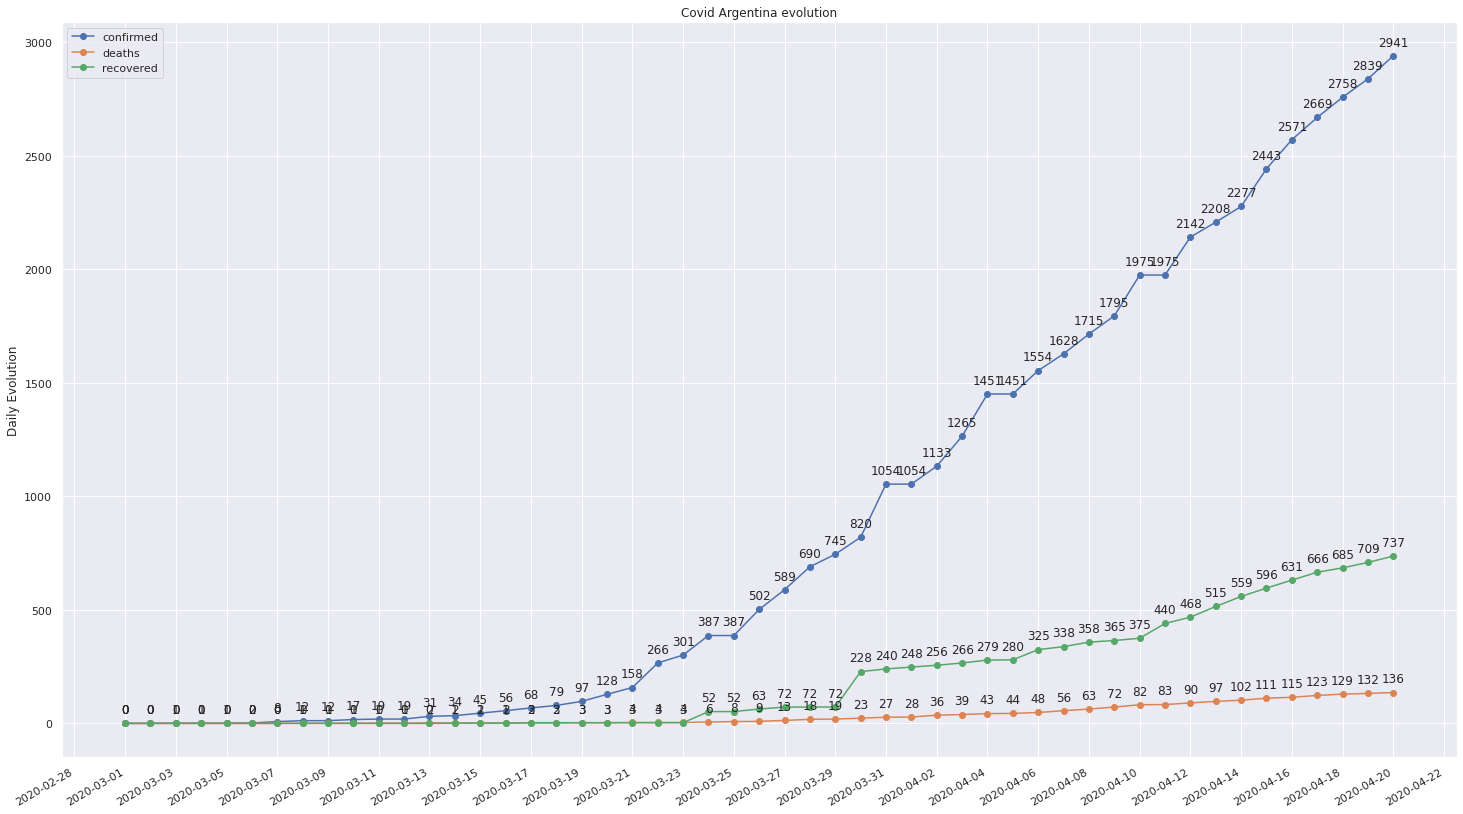

In [47]:
cols_plot = ['confirmed', 'deaths', 'recovered']

fig, ax = plt.subplots()

ax.plot(df2['confirmed'], marker='o', linestyle='-', label='confirmed')
ax.plot(df2['deaths'], marker='o', linestyle='-', label='deaths')
ax.plot(df2['recovered'], marker='o', linestyle='-', label='recovered')
#ax.plot(df2[cols_plot], marker='o', linestyle='-')

ax.set_ylabel('Daily Evolution')
ax.set_title('Covid Argentina evolution')

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'));

plt.legend(loc="upper left")
#plt.legend(cols_plot)

fig.autofmt_xdate()

for X, Y in zip(df2.index, df2['confirmed']):
    label = "{:.0f}".format(Y)

    ax.annotate(label, # this is the text
                 (X,Y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

for X, Y in zip(df2.index, df2['deaths']):
    label = "{:.0f}".format(Y)

    ax.annotate(label, # this is the text
                 (X,Y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

for X, Y in zip(df2.index, df2['recovered']):
    label = "{:.0f}".format(Y)

    ax.annotate(label, # this is the text
                 (X,Y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center